# YearPredictionMSD Data Set
## Python for Data Analysis - Final Project
### CESAR Thomas, CHARRUEY Adrien - ESILV, A4, DIA 3

### Library Imports

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


### Data Set Import
The data set can be downloaded here : https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD

In [30]:
df = pd.read_csv(r'C:\Users\adrie\Documents\ESILV 2021-2022\S7\Python for data analysis S7\Final Project CESAR CHARRUEY\YearPredictionMSD.txt',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


### Data Preprocessing

In [31]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


We rename the first column of the dataframe

In [32]:
df.rename(columns={0:'year'}, inplace=True)

In [33]:
df.head()

,year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


We check for null values :

In [34]:
df.isnull().sum().sum()

0

We can see that there are no null values in the dataframe. We can proceed to the exploratory analysis.
### Exploratory Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


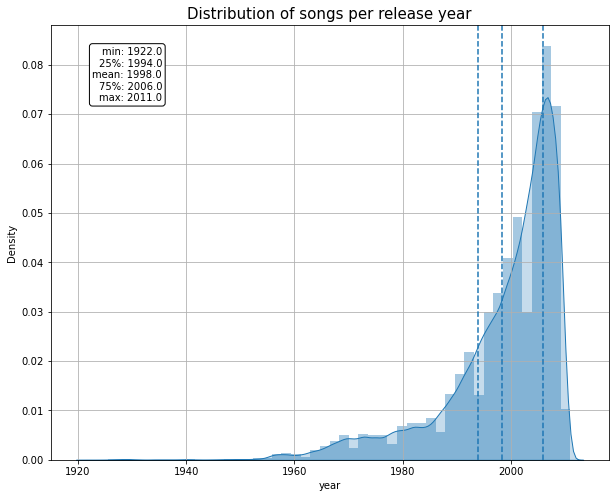

In [35]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_title('Distribution of songs per release year', fontsize=15)
variable = df['year']

sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax)
des = df['year'].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["mean"], ls='--')
ax.axvline(des["75%"], ls='--')
ax.grid(True)

des = round(des).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.20, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1));

We can see that there is a peak in the year 2000s

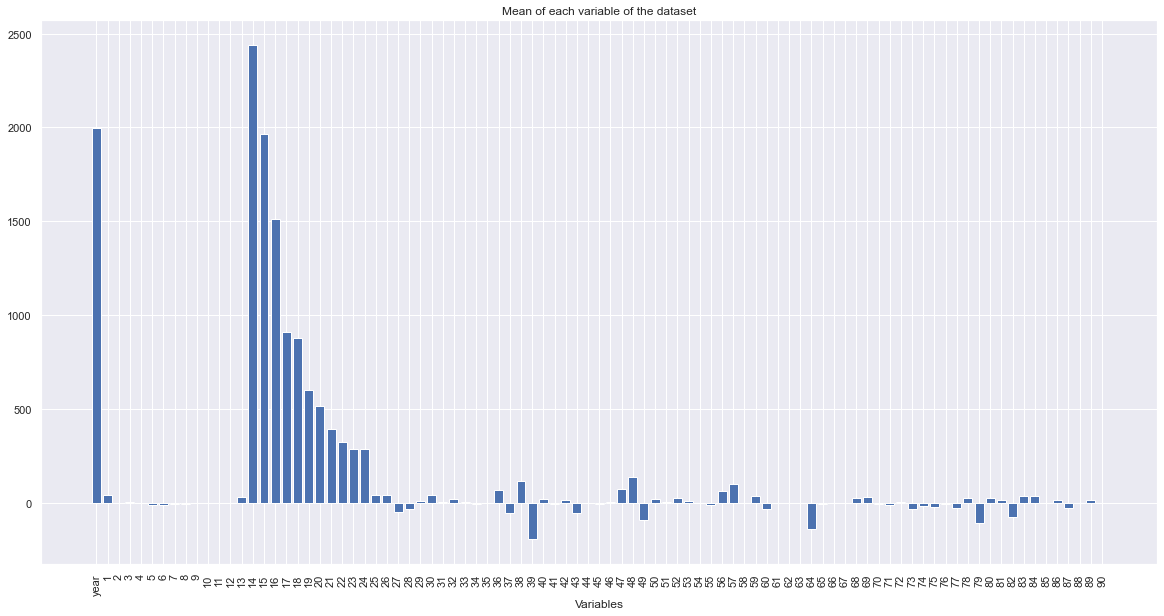

In [153]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df.columns.map(str), df.mean().values)
ax.set_xlabel('Variables')
plt.xticks(rotation = 90)
plt.title('Mean of each variable of the dataset');

The year and variables from 14 to 24 have much greater means than the other variables.

<AxesSubplot:xlabel='variable', ylabel='value'>

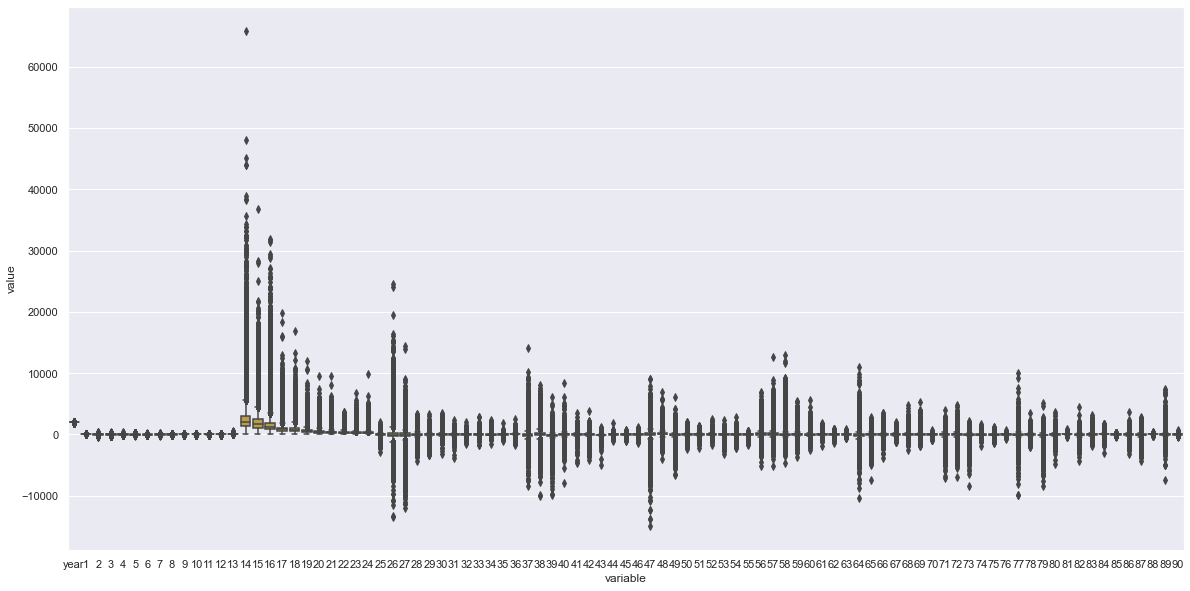

In [125]:
df_melted = pd.melt(df)

sns.set(rc={"figure.figsize":(20, 10)}) #width=3, #height=4
sns.boxplot(x='variable', y='value', data=df_melted)

We can see that there is a great number of major outliers for variables 14 to 90.

(463715, 91)
(51630, 91)


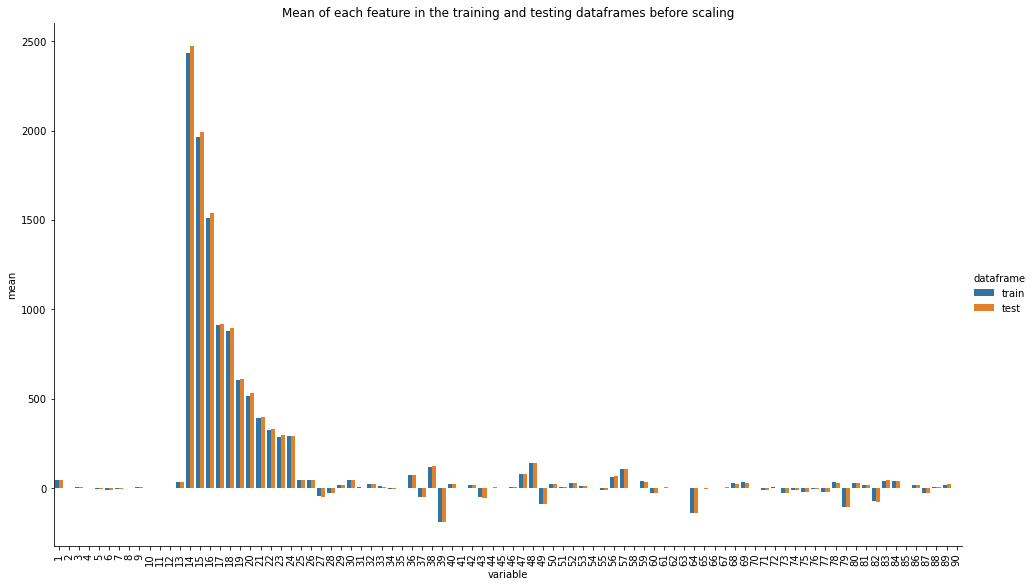

In [121]:
# TEST TEST TEST TEST
df_train=df.iloc[:463715,:]
print(df_train.shape)
df_test=df.iloc[463715:,:]
print(df_test.shape)
means = pd.DataFrame(list(zip(df_train.columns, df_train.mean(), df_test.mean())),
                   columns=['variable', 'train', 'test'])
means.drop(0, inplace=True)

means = pd.melt(means, id_vars="variable", var_name="dataframe", value_name="mean")

sns.catplot(x='variable', y='mean', hue='dataframe', data=means, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes before scaling');

### Principal Component Analysis (PCA)
To reduce the dimensionnality of the data, we perform a PCA.

In [36]:
# Separate target and features
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

pca = decomposition.PCA(n_components=20).fit(X)
X_pca = pca.transform(X)
print('X.shape : ', X.shape, '\nX_pca.shape : ', X_pca.shape)

cols = ['year']
for m in range(1, X_pca.shape[1]+1):
    cols.append("PrincComp{}".format(m))

# We re concatenate X_pca and y
df_pca = pd.DataFrame(np.append(y.reshape(y.shape[0],1), X_pca, axis=1), columns=cols)
#df_pca["Decade"] = df_pca["Decade"].astype(int)
print('df_pca.shape : ', df_pca.shape)
df_pca.head()

X.shape :  (515345, 90) 
X_pca.shape :  (515345, 20)
df_pca.shape :  (515345, 21)


,year,PrincComp1,PrincComp2,PrincComp3,PrincComp4,PrincComp5,PrincComp6,PrincComp7,PrincComp8,PrincComp9,...,PrincComp11,PrincComp12,PrincComp13,PrincComp14,PrincComp15,PrincComp16,PrincComp17,PrincComp18,PrincComp19,PrincComp20
0,2001.0,-2415.709246,28.475381,123.781901,-102.257828,99.707772,-77.035316,-248.800298,30.293866,-155.351136,...,-84.487701,-13.783225,63.066174,164.739838,25.445658,-70.767253,7.182505,-15.289931,-7.856984,-24.970738
1,2001.0,-1439.821294,1129.524017,-233.777907,12.319122,301.114796,173.158199,173.540394,-175.964033,228.314469,...,-234.725376,22.484229,122.336444,-21.699588,96.352480,32.410162,79.956819,76.301342,-240.839792,57.362132
2,2001.0,-2343.676031,21.817130,32.984210,-54.366457,-13.078743,-385.517798,-134.334400,100.919499,-133.438052,...,-41.069099,102.322957,237.930618,123.778969,92.275835,139.632972,59.996848,134.616608,-11.984862,-11.034789
3,2001.0,-1404.432485,1243.169773,-271.679414,126.846166,-428.941451,59.372643,-462.262452,-2.776497,166.186875,...,123.551791,140.675767,123.258696,44.970841,-300.609257,-78.273850,-36.044488,-110.398566,53.397188,-43.052011
4,2001.0,-2409.952844,542.542474,175.953590,-12.981336,21.812339,-232.403304,-240.805444,116.737859,1.588735,...,-33.911703,-154.718506,43.348410,32.693095,18.940538,-35.911049,-21.544445,-27.519473,-33.089880,6.809720


### Splitting the data set
We follow the instruction given on the data set page on the UCI Machine Learning Repository and split the data set this way :

train: first 463,715 examples

test: last 51,630 examples

Which according to the website "avoids the 'producer effect' by making sure no song
from a given artist ends up in both the train and test set."

In [37]:
df_train=df_pca.iloc[:463715,:]
print(df_train.shape)
df_test=df_pca.iloc[463715:,:]
print(df_test.shape)

(463715, 21)
(51630, 21)


In [38]:
df_train.describe()

,year,PrincComp1,PrincComp2,PrincComp3,PrincComp4,PrincComp5,PrincComp6,PrincComp7,PrincComp8,PrincComp9,...,PrincComp11,PrincComp12,PrincComp13,PrincComp14,PrincComp15,PrincComp16,PrincComp17,PrincComp18,PrincComp19,PrincComp20
count,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,...,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000
mean,1998.386095,-5.476138,1.352401,0.640833,0.414403,0.371810,-0.336578,-0.005617,-0.201712,0.334221,...,0.172393,0.324366,-0.243184,-0.278463,-0.213696,-0.096944,0.756056,0.410662,0.048627,-0.259120
std,10.939767,2113.135895,1173.808867,934.578844,686.050132,542.484336,464.833278,412.714176,394.404730,384.342494,...,331.583613,305.706550,284.333909,261.744538,260.352691,250.725036,232.686702,228.369700,221.601727,194.964069
min,1922.000000,-3673.721949,-24879.508973,-16701.813748,-17848.864823,-8429.438984,-8251.586950,-8704.969046,-8867.821433,-6756.454062,...,-6383.712970,-5314.357068,-8065.324209,-4226.924583,-7951.168461,-5665.911919,-3629.492353,-4579.784415,-5251.728096,-3937.322088
25%,1994.000000,-1449.448717,-517.474917,-409.000108,-278.506972,-238.017702,-214.129558,-184.696628,-159.567660,-202.423030,...,-162.011860,-129.156098,-129.495253,-129.357929,-102.833536,-117.601185,-102.268956,-101.229906,-101.456454,-90.763688
50%,2002.000000,-428.507411,55.783251,-58.412225,47.589302,-1.939203,-8.015623,-2.499857,-12.945967,-24.299957,...,-6.756932,11.143629,0.308417,-0.207779,3.260234,-8.971127,-0.807691,6.437916,8.259710,-0.748006
75%,2006.000000,923.698160,507.619873,344.026435,309.255566,215.333782,203.989206,189.410446,137.238857,181.244887,...,146.832343,140.508199,123.709724,117.807791,112.903296,114.189966,109.164231,107.096485,107.799729,87.917139
max,2011.000000,59569.023851,28255.318815,30757.245351,18740.613261,13814.605065,10156.240834,12583.554011,12457.435112,10356.694272,...,9132.497616,9693.545201,10068.878938,6213.133881,11831.988629,8844.609415,6138.193171,4542.416467,5300.509862,5581.686408


In [39]:
df_test.describe()

,year,PrincComp1,PrincComp2,PrincComp3,PrincComp4,PrincComp5,PrincComp6,PrincComp7,PrincComp8,PrincComp9,...,PrincComp11,PrincComp12,PrincComp13,PrincComp14,PrincComp15,PrincComp16,PrincComp17,PrincComp18,PrincComp19,PrincComp20
count,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,...,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000
mean,1998.495758,49.183948,-12.146596,-5.755644,-3.721966,-3.339416,3.022975,0.050445,1.811681,-3.001807,...,-1.548348,-2.913295,2.184162,2.501014,1.919314,0.870699,-6.790524,-3.688358,-0.436742,2.327291
std,10.852015,2126.340512,1169.192120,932.746968,688.409857,550.249770,467.421163,410.287899,391.358076,384.435727,...,331.667257,301.386168,287.689427,264.126374,254.520083,248.381076,243.327274,233.879233,226.763327,201.669655
min,1927.000000,-3477.322575,-15902.915432,-13929.037937,-16924.277319,-4799.754254,-4344.865750,-4778.602356,-4852.608863,-5466.706979,...,-4579.455822,-4830.713798,-4938.326823,-2443.041926,-4028.851450,-2988.867007,-2889.130545,-3491.923722,-3814.741221,-4180.290939
25%,1995.000000,-1423.485024,-531.775746,-423.370087,-282.124142,-244.429554,-219.113014,-188.914545,-161.174923,-205.363693,...,-166.719734,-133.395227,-129.693755,-128.244395,-100.177552,-117.443707,-111.443721,-107.602348,-102.843934,-90.460044
50%,2002.000000,-382.056412,45.397313,-63.641040,42.693481,-4.758006,-11.022954,-3.968353,-10.962888,-27.960440,...,-10.649754,8.135823,1.402866,2.379337,5.943751,-7.660142,-4.787971,2.602594,8.076810,-0.634900
75%,2006.000000,1010.533585,493.979721,341.097879,307.675871,212.217626,207.178954,188.289488,141.487769,176.296932,...,148.595009,139.421131,127.529954,119.775238,114.574935,118.352532,106.699309,105.187924,110.037693,89.883653
max,2010.000000,38929.389271,19059.361458,17997.389011,10276.097642,13545.031027,5387.805146,6260.461585,6875.187898,6642.884835,...,5882.293338,4271.627285,3070.937682,8547.585041,3445.031613,3351.510994,4170.399030,3343.624663,3651.790176,3374.454957


### Scaling
We scale all the features, not the target

In [40]:
################ PROOOOOOOOOBLEM WITTTTTHHHHHHH THE PCA ###########################

# create the scaler 
ss = preprocessing.StandardScaler() 

# create new dataframes to keep the non scaled ones
df_train_s=df_train.copy()
df_test_s=df_test.copy()

# apply the scaler to the dataframe subset 
df_train_s.iloc[:,1:] = ss.fit_transform(df_train_s.iloc[:,1:])
df_test_s.iloc[:,1:] = ss.fit_transform(df_test_s.iloc[:,1:])

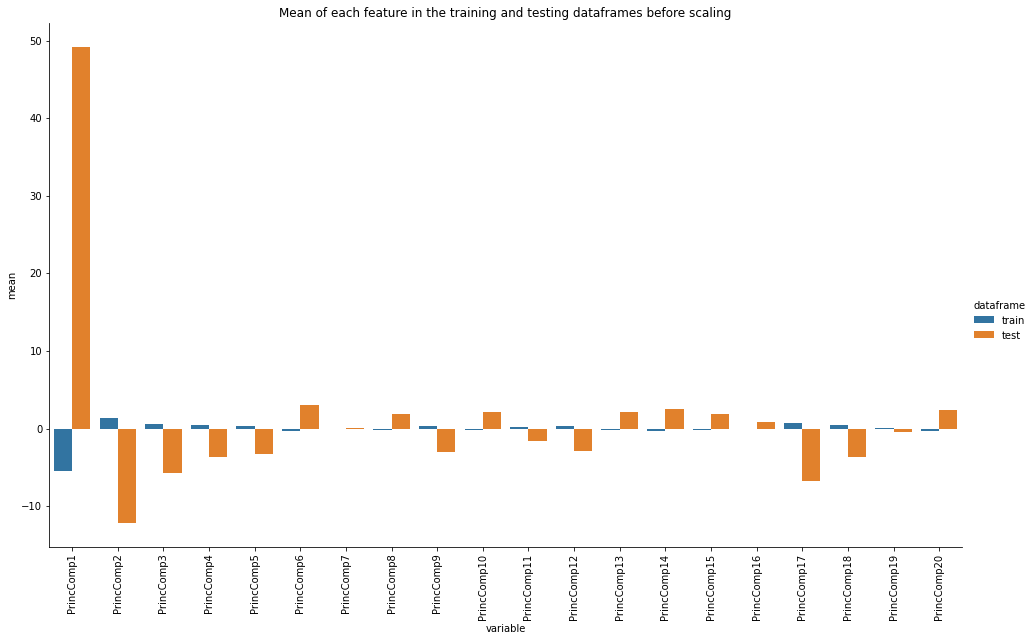

In [116]:
means = pd.DataFrame(list(zip(df_train.columns, df_train.mean(), df_test.mean())),
                   columns=['variable', 'train', 'test'])
means.drop(0, inplace=True)

means = pd.melt(means, id_vars="variable", var_name="dataframe", value_name="mean")

sns.catplot(x='variable', y='mean', hue='dataframe', data=means, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes before scaling');

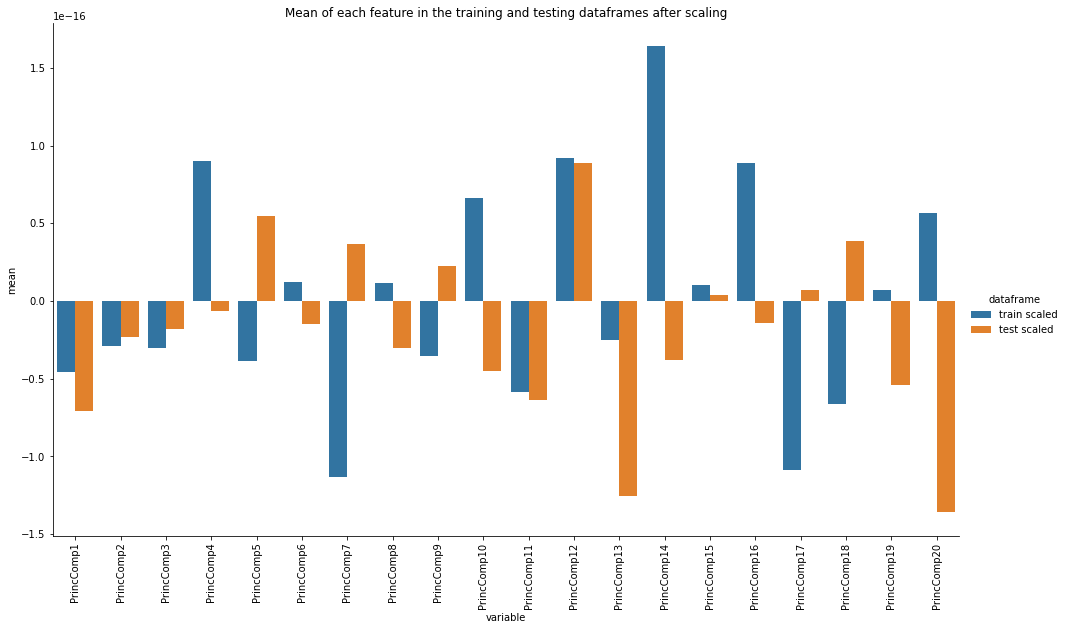

In [117]:
means = pd.DataFrame(list(zip(df_train.columns, df_train_s.mean(), df_test_s.mean())),
                   columns=['variable', 'train scaled', 'test scaled'])
means.drop(0, inplace=True)

means = pd.melt(means, id_vars="variable", var_name="dataframe", value_name="mean")

sns.catplot(x='variable', y='mean', hue='dataframe', data=means, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes after scaling');

We can see that the mean of the scaled dataframes are very close to zero.

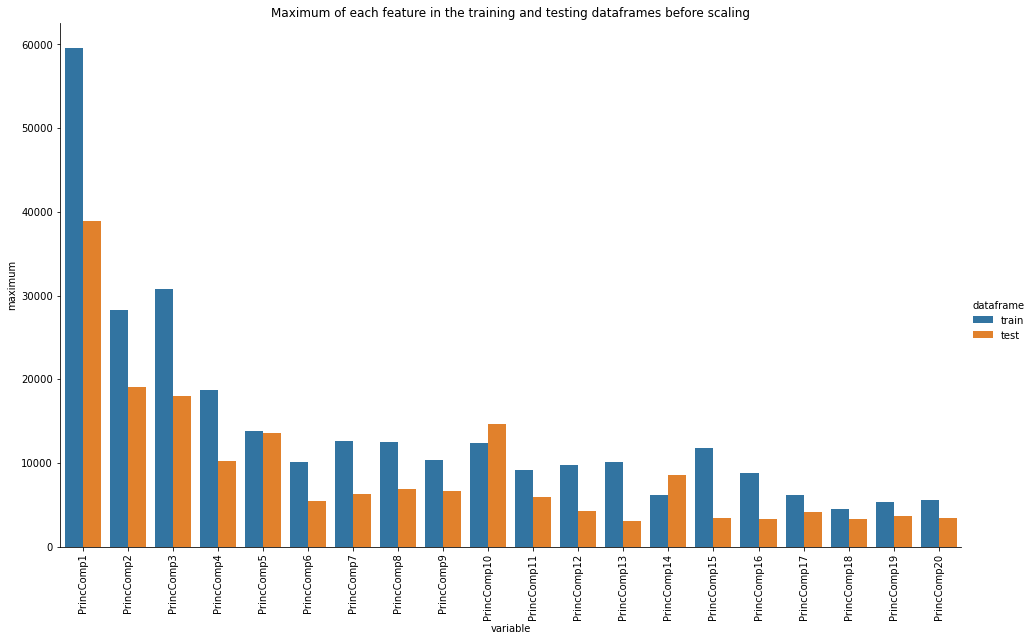

In [118]:
maxi = pd.DataFrame(list(zip(df_train.columns, df_train.max(), df_test.max())),
                   columns=['variable', 'train', 'test'])
maxi.drop(0, inplace=True)

maxi = pd.melt(maxi, id_vars="variable", var_name="dataframe", value_name="maximum")

sns.catplot(x='variable', y='maximum', hue='dataframe', data=maxi, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Maximum of each feature in the training and testing dataframes before scaling');

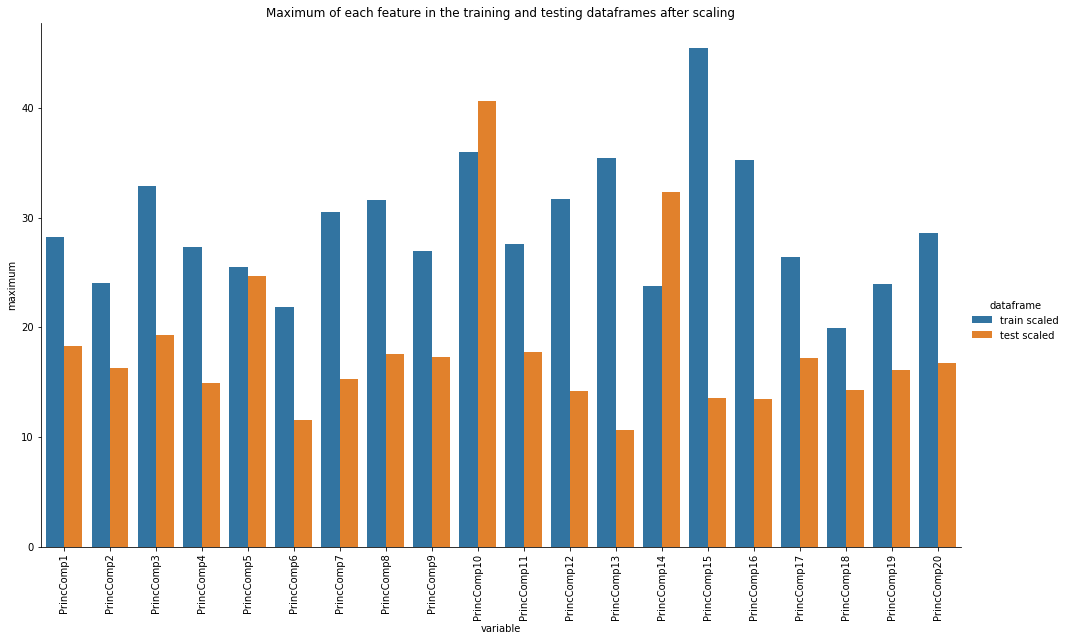

In [120]:
maxi = pd.DataFrame(list(zip(df_train.columns, df_train_s.max(), df_test_s.max())),
                   columns=['variable', 'train scaled', 'test scaled'])
maxi.drop(0, inplace=True)

maxi = pd.melt(maxi, id_vars="variable", var_name="dataframe", value_name="maximum")

sns.catplot(x='variable', y='maximum', hue='dataframe', data=maxi, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Maximum of each feature in the training and testing dataframes after scaling');

### Feature selection

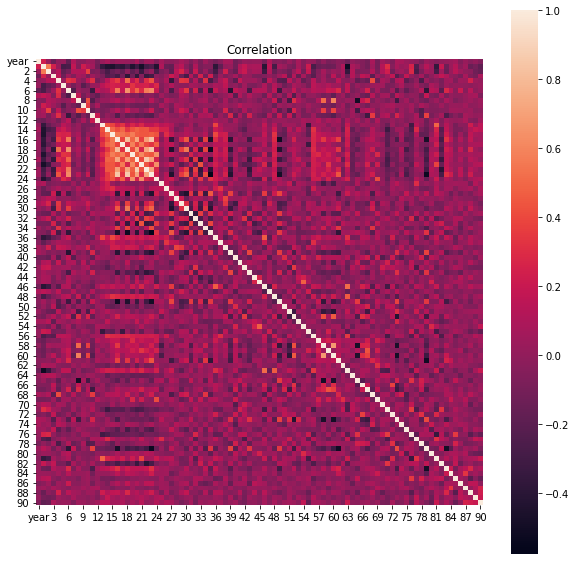

In [142]:
# Correlation between the release year and features
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
plt.title("Correlation")
sns.heatmap(corr, square=True);

We focus on the correlation of the features to the year.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


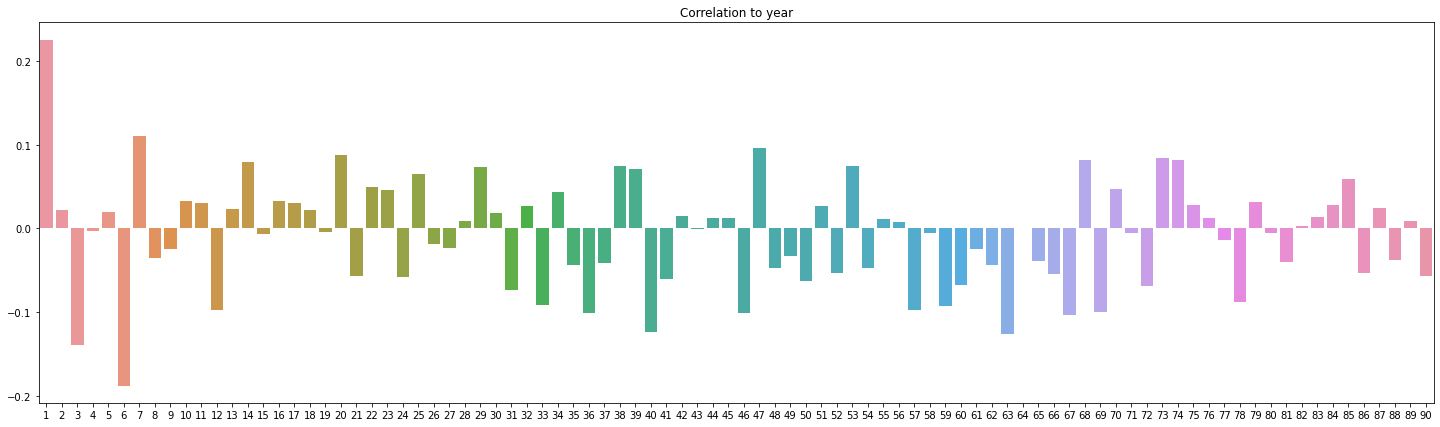

In [143]:
fig, ax = plt.subplots(figsize=(25,7)) 
sns.barplot(corr['year'][1:].index,corr['year'][1:].values)
plt.title('Correlation to year');